In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
import seaborn as sns

## Import Data

In [3]:
dataset = pd.read_csv('HappinessAlcoholConsumption.csv')

In [4]:
dataset.head(6)

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97
5,Canada,North America,north,7.404,922,42.349,240,122,100


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 9 columns):
Country             122 non-null object
Region              122 non-null object
Hemisphere          122 non-null object
HappinessScore      122 non-null float64
HDI                 122 non-null int64
GDP_PerCapita       122 non-null float64
Beer_PerCapita      122 non-null int64
Spirit_PerCapita    122 non-null int64
Wine_PerCapita      122 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 8.7+ KB


In [6]:
dataset.describe()

,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,5.524828,740.877049,91.482836,137.565574,96.598361,66.598361
std,1.148736,149.846124,209.577313,104.817353,81.435028,88.121503
min,3.069000,351.000000,1.029000,1.000000,1.000000,1.000000
25%,4.528250,663.750000,4.134250,38.250000,25.500000,5.000000
50%,5.542000,757.500000,12.016000,125.500000,82.500000,16.000000
75%,6.477000,861.500000,41.990000,224.750000,142.500000,112.750000
max,7.526000,951.000000,953.000000,376.000000,373.000000,370.000000


## Explore and transform

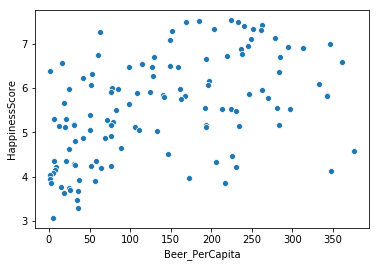

In [7]:
ax = sns.scatterplot(x='Beer_PerCapita', y='HappinessScore', data=dataset)

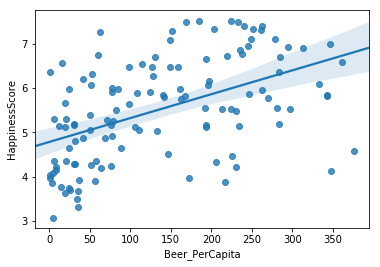

In [8]:
##sns.regplot(x=, y=, data=), sns.lmplot(x=, y=, data=, x_estimator=np.mean) and sns.jointplot(x=, y=, data=, kind="reg")
ax = sns.regplot(x='Beer_PerCapita', y='HappinessScore', data=dataset)

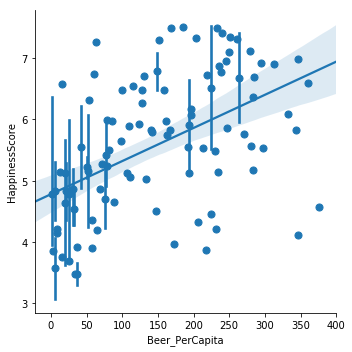

In [9]:
ax = sns.lmplot(x='Beer_PerCapita', y='HappinessScore', data=dataset, x_estimator=np.mean)

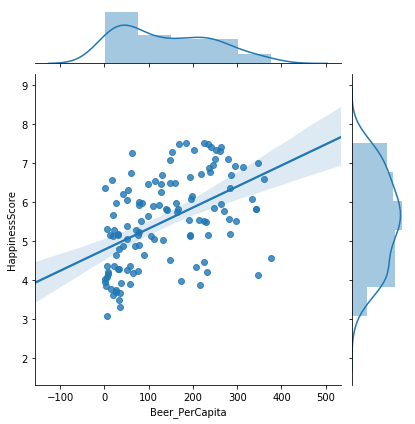

In [10]:
ax = sns.jointplot(x='Beer_PerCapita', y='HappinessScore', data=dataset, kind="reg")

## Build Model

In [13]:
#Use the corr() method below to statistically analyse how well a linear relationship suits the data above
corr = dataset.corr()
corr

,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
HappinessScore,1.000000,0.815163,-0.451425,0.493367,0.256399,0.450589
HDI,0.815163,1.000000,-0.573734,0.588394,0.393413,0.602561
GDP_PerCapita,-0.451425,-0.573734,1.000000,-0.369936,-0.260818,-0.200154
Beer_PerCapita,0.493367,0.588394,-0.369936,1.000000,0.364855,0.474274
Spirit_PerCapita,0.256399,0.393413,-0.260818,0.364855,1.000000,0.118718
Wine_PerCapita,0.450589,0.602561,-0.200154,0.474274,0.118718,1.000000


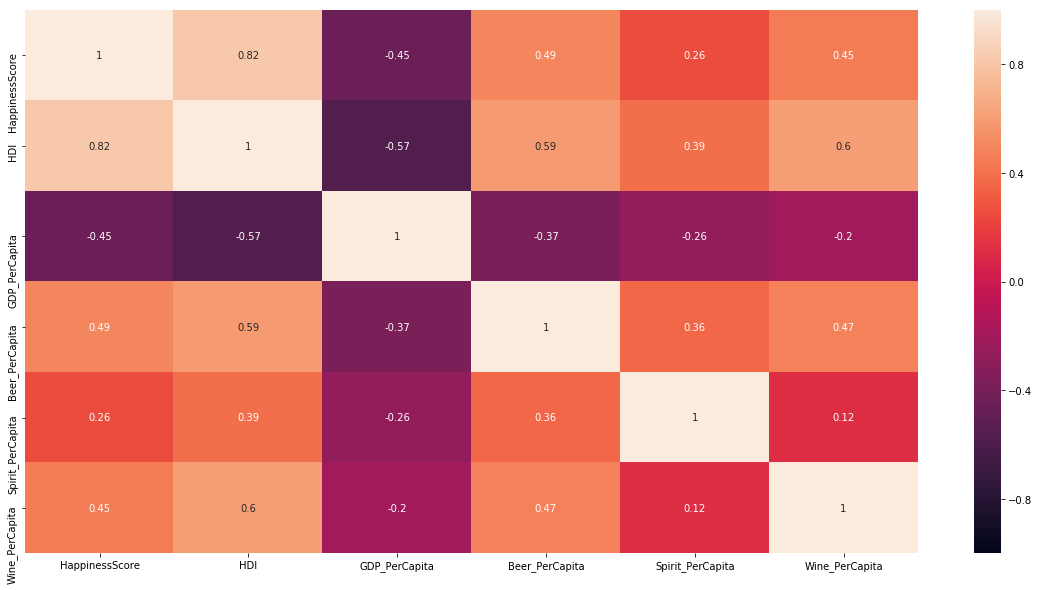

In [12]:
plt.figure(figsize = (20,10))
ax1=sns.heatmap(corr, vmin=-1, vmax=1, annot = True, )

In [16]:
#Split the dataset into 75% training and 25% test datasets
X = dataset[['Beer_PerCapita']]
y = dataset[['HappinessScore']]

## Create Variables
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.25,
                                                   random_state = 123)

In [18]:
print (X_train.shape, y_train.shape)


(91, 1) (91, 1)


In [22]:
#Combine the X_train and y_train into a new dataset
Train = pd.concat([X_train, y_train], axis=1)
Train.head(10)

,Beer_PerCapita,HappinessScore
65,230,5.488
23,285,6.701
9,152,7.291
91,147,4.513
79,194,5.123
38,333,6.084
88,89,4.655
117,36,3.666
82,51,5.045
119,34,3.484


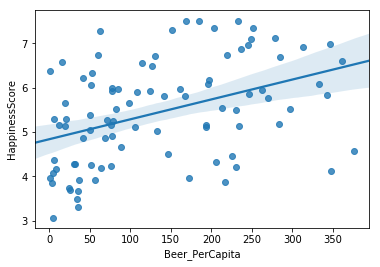

In [25]:
#Re-plot beer consumption against happiness score using sns and plot the linear regression line using regplot using the 
#training dataset

ax = sns.regplot(x='Beer_PerCapita', y='HappinessScore', data=Train)

In [26]:
#Perform a linear regression model using linear_model.LinearRegression from sklearn, and fit the model with your training data
regression_model = linear_model.LinearRegression()
regression_model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
#Evaluate the model
print('R-squared is:', regression_model.score(X_train, y_train))
print('Intercept is:', regression_model.intercept_)
print('X1 Coeff is:', regression_model.coef_)

R-squared is: 0.17086397872744372
Intercept is: [4.83636699]
X1 Coeff is: [[0.00448793]]


In [43]:
#Just double check that the correlation is the same as the sqrt of the r-squared
print(Train['Beer_PerCapita'].corr(Train['HappinessScore']))
print(regression_model.score(X_train, y_train)**0.5)

0.4133569628389533
0.4133569628389532


In [52]:
#Use the .predict function in the model to predict the happiness score based on beer consumption. 
#Save the results in a variable call y_pred
y_pred = regression_model.predict(X_test)
y_pred = pd.DataFrame(y_pred)

In [64]:
#The indexes of y_test need to be reset to concatenate efficiently both variables (y_test and y_pred),
# that is relatively simple using the function .reset_index()

y_test.reset_index()
y_pred.reset_index()

,index,0
0,0,6.016693
1,1,4.930614
2,2,5.841664
3,3,5.096667
4,4,4.948565
5,5,5.505069
6,6,5.549948
7,7,4.840855
8,8,4.921638
9,9,6.110940


In [62]:
#It is important to concatenate both variables into a single data frame before running the function .scatterplot
Eval = pd.concat([y_test, y_pred], axis=1)

#Rename the column headings
Eval.columns = ['y_test', 'y_pred']
Eval.head()

,y_test,y_pred
0,7.526,6.016693
1,NaN,4.930614
2,NaN,5.841664
3,NaN,5.096667
4,7.413,4.948565


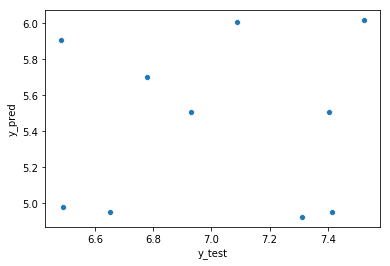

In [63]:
#Use sns to plot a graph showing the relationship between the actual HappinessScore value and predicted HappinessScore value
ax = sns.scatterplot(x='y_test', y='y_pred', data=Eval)

## RMSE

In [65]:
#Much easier to just use this!!
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms

0.8934510872196845

In [70]:
#Calculate the difference between predicted and observed values
diff = y_test - y_pred
#Calculate the squared differences
diff_sq = diff**2
#Calculate the mean of the squared differences
mean_diff_sq = diff_sq.mean()
#square root of MSE
RMSE = np.sqrt(mean_diff_sq)
RMSE


HappinessScore   NaN
0                NaN
dtype: float64

## Significance of the model

In [71]:
regression_model = smf.ols('HappinessScore ~ Beer_PerCapita', data= Train).fit()

In [72]:
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     18.34
Date:                Mon, 17 Dec 2018   Prob (F-statistic):           4.65e-05
Time:                        18:05:51   Log-Likelihood:                -132.40
No. Observations:                  91   AIC:                             268.8
Df Residuals:                      89   BIC:                             273.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.8364      0.180     26.868      0.000       4.479       5.194
Beer_PerCapita     0.0045      0.001      4.283      0.000       0.002       0.007
==============================================================================
Omnibus:                        4.891   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.087   Jarque-Bera (JB):                2.365
Skew:                          -0.026   Prob(JB):                        0.306
Kurtosis:                       2.212   Cond. No.                         281.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Create Multivariate linear regression

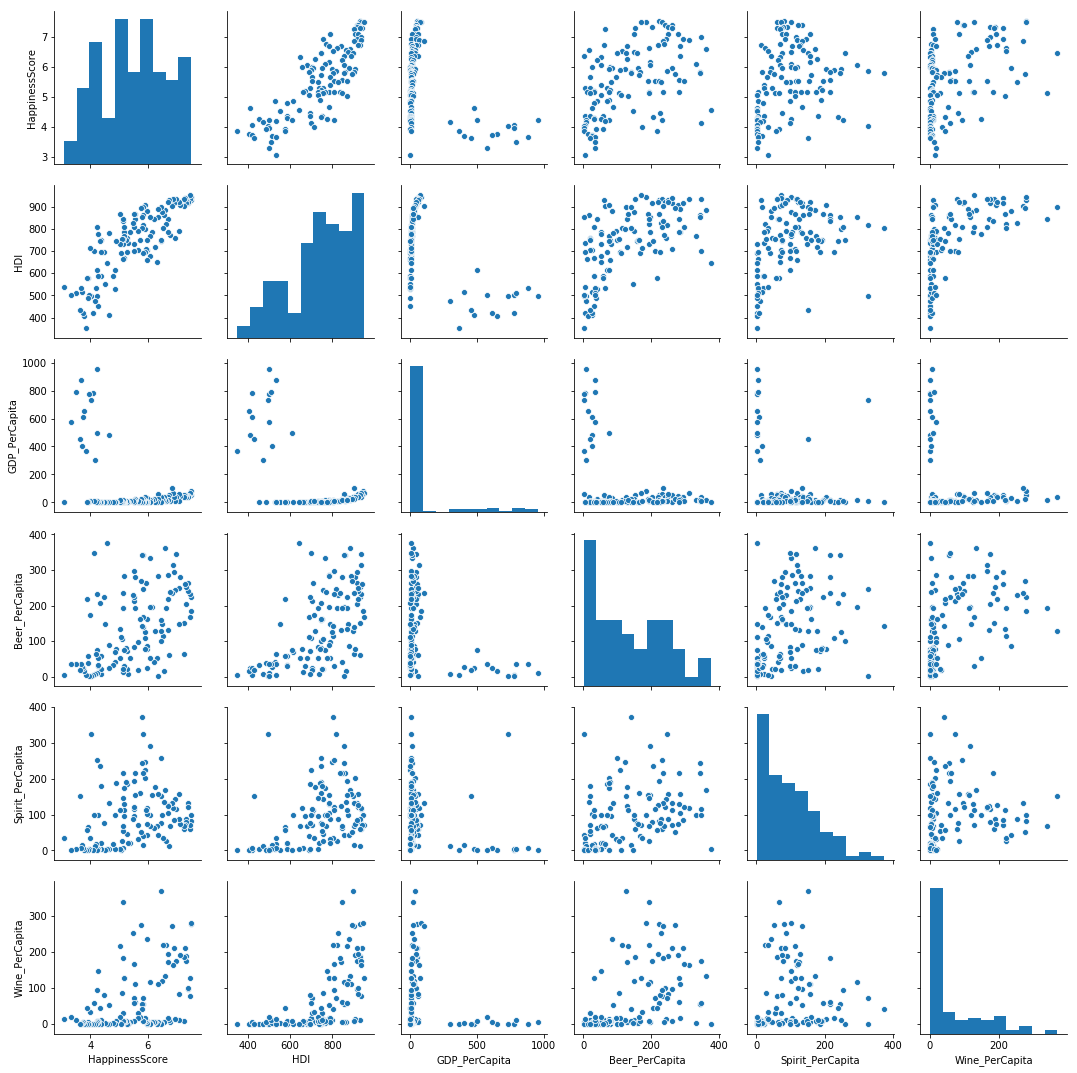

In [73]:
ax = sns.pairplot(dataset)

In [74]:
dataset.corr()

,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
HappinessScore,1.000000,0.815163,-0.451425,0.493367,0.256399,0.450589
HDI,0.815163,1.000000,-0.573734,0.588394,0.393413,0.602561
GDP_PerCapita,-0.451425,-0.573734,1.000000,-0.369936,-0.260818,-0.200154
Beer_PerCapita,0.493367,0.588394,-0.369936,1.000000,0.364855,0.474274
Spirit_PerCapita,0.256399,0.393413,-0.260818,0.364855,1.000000,0.118718
Wine_PerCapita,0.450589,0.602561,-0.200154,0.474274,0.118718,1.000000


In [75]:
#Split the dataset into 75% training and 25% test datasets
X = dataset[['HDI', 'GDP_PerCapita', 'Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita']]
y = dataset[['HappinessScore']]

## Create Variables
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.25,
                                                   random_state = 123)

In [76]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(91, 5) (91, 1)
(31, 5) (31, 1)


In [78]:
X_train.head()

,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
65,828,12.299,230,87,254
23,785,14.333,285,104,18
9,932,51.845,152,60,186
91,553,1.375,147,1,4
79,845,19.872,194,67,339


In [79]:
#Perform a linear regression model using linear_model.LinearRegression from sklearn, and fit the model with your training data
regression_model = linear_model.LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
#Evaluate the model
print('R-squared is:', regression_model.score(X_train, y_train))
print('Intercept is:', regression_model.intercept_)
print('X1 Coeff is:', regression_model.coef_)

R-squared is: 0.686674742999301
Intercept is: [0.21626397]
X1 Coeff is: [[ 7.31675343e-03  8.85459266e-05  5.00997412e-04 -1.51828496e-03
  -1.68096655e-03]]


In [81]:
Train = pd.concat([X_train, y_train], axis=1)

In [82]:
Formula = 'HappinessScore ~ HDI + GDP_PerCapita + Beer_PerCapita + Spirit_PerCapita + Wine_PerCapita'
regression_model = smf.ols(Formula, data=Train).fit() 
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:         HappinessScore   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     37.26
Date:                Mon, 17 Dec 2018   Prob (F-statistic):           4.78e-20
Time:                        18:30:10   Log-Likelihood:                -88.124
No. Observations:                  91   AIC:                             188.2
Df Residuals:                      85   BIC:                             203.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2163      0.506  

In [83]:
y_pred = regression_model.predict(X_test)
y_pred = pd.DataFrame(y_pred)

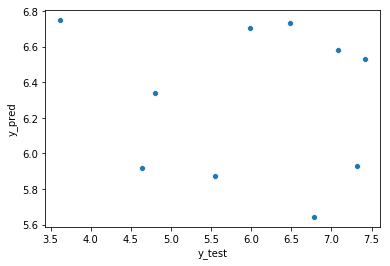

In [90]:
y_test = y_test['HappinessScore'].reset_index()
y_obs_pred = pd.concat([y_test['HappinessScore'], y_pred], axis=1)
y_obs_pred.columns = ['y_test', 'y_pred']
y_obs_pred['diff']= y_obs_pred['y_test']-y_obs_pred['y_pred']
ax = sns.scatterplot(x='y_test', y='y_pred', data=y_obs_pred)


In [92]:
diff = y_obs_pred['y_pred']-y_obs_pred['y_test']
diff_sq = diff**2
mean_diff_sq = diff_sq.mean()
RMSE = np.sqrt(mean_diff_sq)
RMSE


1.3689066461619046